In [42]:
import json

data = []
with open('sarcasm/Sarcasm_Headlines_Dataset_v2.json', "r") as f:
    for line in f:
        data.append(json.loads(line))

In [43]:
sentences  =   []
labels     =   []
urls       =   []
for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token= "<00V>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [45]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding="post")
print(padded[0])
print(padded.shape)

[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
(28619, 152)


In [46]:
train_size = 20000

train_sen  = sentences[0:train_size]
test_sen   = sentences[train_size:]

train_labels  = labels[0:train_size]
test_labels   = labels[train_size:]

In [47]:
tokenizer = Tokenizer(num_words=10000, oov_token="<00V>")
tokenizer.fit_on_texts(train_sen)

word_index = tokenizer.word_index

In [48]:
train_seq = tokenizer.texts_to_sequences(train_sen)
train_pad = pad_sequences(train_seq, maxlen=100, padding="post", truncating="post")

test_seq = tokenizer.texts_to_sequences(test_sen)
test_pad = pad_sequences(test_seq, maxlen=100, padding="post", truncating="post")

In [49]:
from tensorflow.keras import layers as ly
from tensorflow.keras.models import Sequential

In [50]:
model = Sequential([
    ly.Embedding(10000, 16, input_length=100),
    ly.GlobalAveragePooling1D(),
    ly.Dense(24, activation="relu"),
    ly.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [52]:
import numpy as np

train_pad = np.array(train_pad)
train_labels = np.array(train_labels)

test_pad = np.array(test_pad)
test_labels = np.array(test_labels)

In [53]:
history = model.fit(train_pad, train_labels, epochs=30, validation_data=(test_pad, test_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6750 - accuracy: 0.5901 - val_loss: 0.5989 - val_accuracy: 0.8072
Epoch 2/30
625/625 - 4s - loss: 0.4511 - accuracy: 0.8270 - val_loss: 0.3845 - val_accuracy: 0.8370
Epoch 3/30
625/625 - 4s - loss: 0.3242 - accuracy: 0.8712 - val_loss: 0.3484 - val_accuracy: 0.8496
Epoch 4/30
625/625 - 4s - loss: 0.2733 - accuracy: 0.8943 - val_loss: 0.3316 - val_accuracy: 0.8569
Epoch 5/30
625/625 - 4s - loss: 0.2381 - accuracy: 0.9081 - val_loss: 0.3316 - val_accuracy: 0.8539
Epoch 6/30
625/625 - 4s - loss: 0.2123 - accuracy: 0.9208 - val_loss: 0.3410 - val_accuracy: 0.8484
Epoch 7/30
625/625 - 4s - loss: 0.1895 - accuracy: 0.9293 - val_loss: 0.3421 - val_accuracy: 0.8515
Epoch 8/30
625/625 - 4s - loss: 0.1713 - accuracy: 0.9363 - val_loss: 0.3502 - val_accuracy: 0.8517
Epoch 9/30
625/625 - 4s - loss: 0.1556 - accuracy: 0.9446 - val_loss: 0.3625 - val_accuracy: 0.8511
Epoch 10/30
625/625 - 4s - loss: 0.1423 - accuracy: 0.9495 - val_loss: 0.3775 - val_accuracy: 0.8481

In [54]:
import matplotlib.pyplot as plt

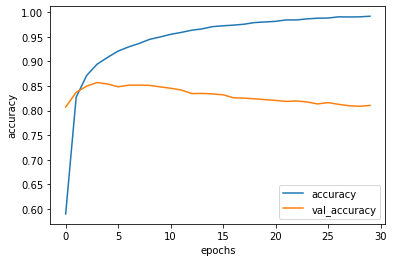

In [55]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

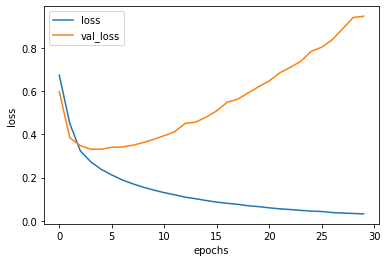

In [56]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss", "val_loss"])
plt.show()